# Exercise1 MINIST TRAINING OPTIMIZATION

* step1 加载必要的库函数

In [9]:
import numpy as np
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D,Input,Dropout
from keras.models import Model
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt

#

* step2 minist数据在keras中自带，可以通过网络加载

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


(60000, 28, 28) (10000, 28, 28)


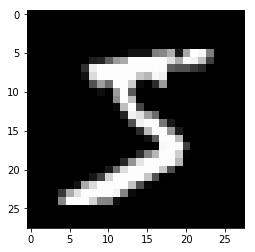

In [5]:
#confirm the data dimention
print(X_train.shape,X_test.shape) 
plt.imshow(X_train[0,:,:],cmap='gray')

* step3 标准化处理

In [6]:
# data pre-processing
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(X_train.shape)

(60000, 784)


* step4 构建CNN网络

In [10]:
# model-sequential
model = Sequential([
    Dense(128, input_dim=784),
    Dense(64, input_dim=128),
    Activation('relu'),
    Dense(32, input_dim=64),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
    Dropout(0.2)
])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)      

* setp5 训练模型

In [11]:
# Another way to define your optimizer
rmsprop = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
# We add metrics to get more results you want to see
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=10, verbose=1, shuffle=True,batch_size=128,validation_data=(X_test,y_test))

Training ------------
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 364us/step - loss: 3.9180 - acc: 0.6056 - val_loss: 0.4472 - val_acc: 0.8845
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 3.4748 - acc: 0.7267 - val_loss: 0.3182 - val_acc: 0.9112
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 3.4597 - acc: 0.7373 - val_loss: 0.2774 - val_acc: 0.9204
Epoch 4/10
60000/60000 [==============================] - 4s 68us/step - loss: 3.4049 - acc: 0.7455 - val_loss: 0.2537 - val_acc: 0.9247
Epoch 5/10
60000/60000 [==============================] - 4s 74us/step - loss: 3.3752 - acc: 0.7503 - val_loss: 0.2347 - val_acc: 0.9302
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 3.3763 - acc: 0.7537 - val_loss: 0.2254 - val_acc: 0.9326
Epoch 7/10
60000/60000 [==============================] 

(100, 10)
[[  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]] 7


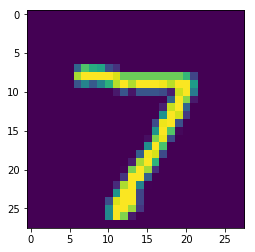

In [13]:
# test the model 
testdata=X_test[:100]
# get the probability value
pred=model.predict(testdata,batch_size=20)
# get the classification value
pred_c=np.argmax(pred,axis=1)
# pred_c=model.predict_classes(testdata,batch_size=20)
print(pred.shape)
reshapedata=testdata.reshape(100,28,28)
plt.imshow(reshapedata[0,:,:])
print(np.round(pred[:1]*100),pred_c[0])

* setp5保存模型

In [107]:
model.save('./mnist.h5')